<a href="https://colab.research.google.com/github/FilipeMSouza/ml-2023-1-trabalho-2/blob/master/Trabalho%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Carregando o dataset
df = pd.read_excel('dataset.xlsx')

In [2]:
df = df.drop(columns=['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'])


In [3]:
for col in df.columns:
    if df[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values))
        df[col] = lbl.transform(df[col].values)

In [4]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [5]:
df = df.fillna(df.median())

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing

In [7]:
df.to_excel('dataset_tratado.xlsx', index=False)

Decision Tree

In [8]:
df_aux = pd.read_excel('dataset_tratado.xlsx')
df_aux = df_aux.drop(columns=['SARS-Cov-2 exam result'])
df_normalized = preprocessing.normalize(df_aux)

X = df_normalized
Y = df['SARS-Cov-2 exam result'] # target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
print('Cauculando a acurácia do modelo de árvore de decisão\n\n')

prds = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, prds).ravel()
print(f'tn {tn}, fp {fp}, fn {fn}, tp {tp}', '\n\n',
      'Accuracy:', (accuracy_score(y_test, prds)), '\n\n',
      'Confusion Matrix \n', (confusion_matrix(y_test, prds)), '\n\n',
      'Classification Report:\n', (classification_report(y_test, prds)))

Cauculando a acurácia do modelo de árvore de decisão


tn 1509, fp 27, fn 148, tp 10 

 Accuracy: 0.8966942148760331 

 Confusion Matrix 
 [[1509   27]
 [ 148   10]] 

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1536
           1       0.27      0.06      0.10       158

    accuracy                           0.90      1694
   macro avg       0.59      0.52      0.52      1694
weighted avg       0.85      0.90      0.87      1694



KNN


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = KNeighborsClassifier(n_neighbors=5).fit(X, Y)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
print('Accuracy:', (accuracy_score(y_test, y_pred)), '\n\n',
      'Confusion Matrix \n', (confusion_matrix(y_test, y_pred)), '\n\n',
      'Classification Report:\n', (classification_report(y_test, y_pred)))

Accuracy: 0.9103596349973162 

 Confusion Matrix 
 [[1683    2]
 [ 165   13]] 

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1685
           1       0.87      0.07      0.13       178

    accuracy                           0.91      1863
   macro avg       0.89      0.54      0.54      1863
weighted avg       0.91      0.91      0.87      1863



Naive Bayes


In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [43]:
model = GaussianNB()

In [48]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:\n", conf_matrix)
print("Revogação das Classes\n", class_report)

Acurácia do modelo: 0.4111647879763822
Matriz de confusão:
 [[ 640 1045]
 [  52  126]]
Revogação das Classes
               precision    recall  f1-score   support

           0       0.92      0.38      0.54      1685
           1       0.11      0.71      0.19       178

    accuracy                           0.41      1863
   macro avg       0.52      0.54      0.36      1863
weighted avg       0.85      0.41      0.50      1863



Extra Kmeas Graph

In [50]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=3,init = 'k-means++', n_init = 'auto')
pred_y = model.fit_predict(df_normalized)

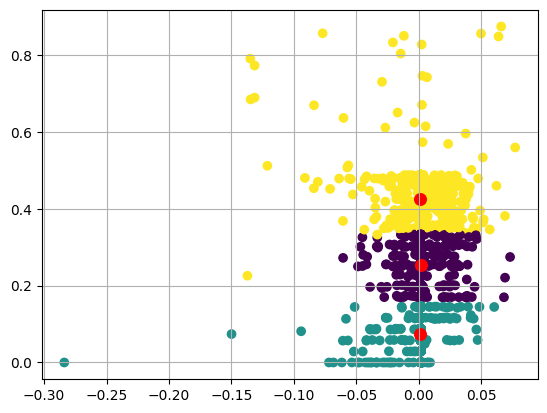

In [52]:
plt.scatter(df_normalized[:,1], df_normalized[:,0] , c = pred_y)
plt.grid()
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,0], s = 70, c = 'red')
plt.savefig('2-clusters.png')